In [2]:
# Install a Drive FUSE wrapper.
# https://github.com/astrada/google-drive-ocamlfuse
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null 
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse

# Generate auth tokens for Colab
from google.colab import auth 
auth.authenticate_user()

# Generate creds for the Drive FUSE library.

from oauth2client.client import GoogleCredentials 
creds = GoogleCredentials.get_application_default()
import getpass 
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass() 
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

# Create a directory and mount Google Drive using that directory.

!mkdir -p drive
!google-drive-ocamlfuse drive

print ('Connected to the Drive')


# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
#print(os.listdir("../input/facial-expression/fer2013/"))

# Any results you write to the current directory are saved as output.

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 145655 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.14-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.14-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.14-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope

In [0]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Collecting the data into a File

In [19]:
filename = 'drive/facial_datasets/fer2013.csv'
label_map = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
#names=['emotion','pixels','usage']
#df=pd.read_csv('drive/fer2013.csv',names=names, na_filter=False)
df=pd.read_csv('drive/facial_datasets/fer2013.csv')
im=df['pixels']
df.head(10)

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
5,2,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...,Training
6,4,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...,Training
7,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...,Training
8,3,85 84 90 121 101 102 133 153 153 169 177 189 1...,Training
9,2,255 254 255 254 254 179 122 107 95 124 149 150...,Training


# Analysis of the dataset.

In [20]:
df['Usage'].value_counts()

Training       28709
PrivateTest     3589
PublicTest      3589
Name: Usage, dtype: int64

# graphs or visualization for distribution

In [0]:
train_data = df.loc[df["Usage"] == "Training"]
public_test_data = df.loc[df["Usage"] == "PublicTest"]
private_test_data = df.loc[df["Usage"] == "PrivateTest"]
train_happy, train_sad, train_angry, train_fear, train_disgust, train_surprise, train_neutral = [0]* 7

public_test_happy,public_test_sad, public_test_angry, public_test_fear, public_test_disgust, public_test_surprise, public_test_neutral = [0]* 7

private_test_happy,private_test_sad, private_test_angry, private_test_fear, private_test_disgust, private_test_surprise, private_test_neutral = [0]* 7

happy, sad, angry,fear, disgust, surprise, neutral = [0] * 7
for index, row in df.iterrows():
  if row["emotion"] == 0:
    angry += 1
  if row["emotion"] == 1:
    disgust += 1
  if row["emotion"] == 2:
    fear += 1
  if row["emotion"] == 3:
    happy += 1
  if row["emotion"] == 4:
    sad += 1
  if row["emotion"] == 5:
    surprise += 1
  if row["emotion"] == 6:
      neutral += 1
  
for index, row in train_data.iterrows():
  if row["emotion"] == 0:
    train_angry += 1
  if row["emotion"] == 1:
    train_disgust += 1
  if row["emotion"] == 2:
    train_fear += 1
  if row["emotion"] == 3:
    train_happy += 1
  if row["emotion"] == 4:
    train_sad += 1
  if row["emotion"] == 5:
    train_surprise += 1
  if row["emotion"] == 6:
    train_neutral += 1

for index, row in public_test_data.iterrows():
  if row["emotion"] == 0:
    public_test_angry += 1
  if row["emotion"] == 1:
    public_test_disgust += 1
  if row["emotion"] == 2:
    public_test_fear += 1
  if row["emotion"] == 3:
    public_test_happy += 1
  if row["emotion"] == 4:
    public_test_sad += 1
  if row["emotion"] == 5:
    public_test_surprise += 1
  if row["emotion"] == 6:
    public_test_neutral += 1

for index, row in private_test_data.iterrows():
  if row["emotion"] == 0:
    private_test_angry += 1
  if row["emotion"] == 1:
    private_test_disgust += 1
  if row["emotion"] == 2:
    private_test_fear += 1
  if row["emotion"] == 3:
    private_test_happy += 1
  if row["emotion"] == 4:
    private_test_sad += 1
  if row["emotion"] == 5:
    private_test_surprise += 1
  if row["emotion"] == 6:
    private_test_neutral += 1

import matplotlib.pyplot as plt

train_count = [train_happy, train_sad, train_angry, train_fear, train_disgust, train_surprise, train_neutral]
data_count = [happy, sad, angry,fear, disgust, surprise, neutral]
public_test_count = [public_test_happy,public_test_sad, public_test_angry, public_test_fear, public_test_disgust, public_test_surprise, public_test_neutral]
private_test_count = [private_test_happy,private_test_sad, private_test_angry, private_test_fear, private_test_disgust, private_test_surprise, private_test_neutral]
emotions = ["happy", "sad", "angry", "fear", "disgust", "surprise", "neutral"]


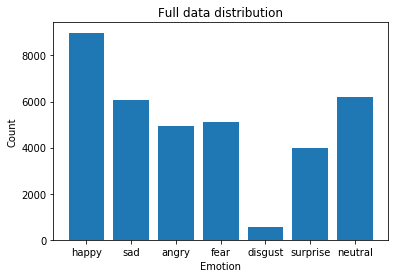

In [22]:
plt.bar(emotions, data_count)
plt.xlabel('Emotion')
plt.ylabel("Count")
plt.title('Full data distribution')
plt.show()

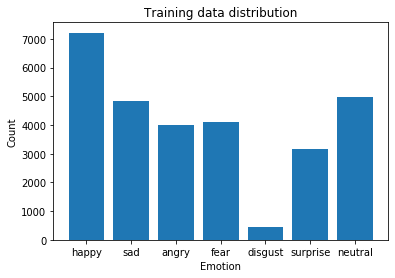

In [23]:
plt.bar(emotions, train_count)
plt.xlabel('Emotion')
plt.ylabel("Count")
plt.title('Training data distribution')
plt.show()

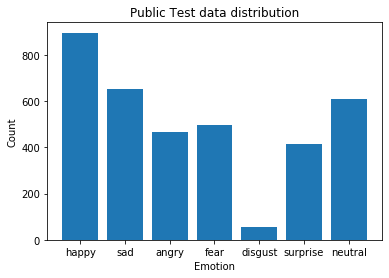

In [24]:
plt.bar(emotions, public_test_count)
plt.xlabel('Emotion')
plt.ylabel("Count")
plt.title('Public Test data distribution')
plt.show()

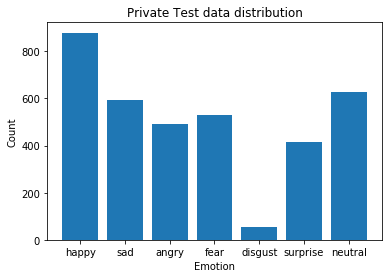

In [25]:
plt.bar(emotions, private_test_count)
plt.xlabel('Emotion')
plt.ylabel("Count")
plt.title('Private Test data distribution')
plt.show()

# Some incorrect classifications and images in FER2013

In [0]:
filename = 'drive/facial_datasets/fer2013.csv'
label_map = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
names=['emotion','pixels','usage']
df=pd.read_csv('drive/facial_datasets/fer2013.csv',names=names, na_filter=False)
#df=pd.read_csv('drive/facial_datasets/fer2013.csv')
im=df['pixels']
import matplotlib.pyplot as plt
for i in range(1,len(df)):  
  if df['emotion'][i] == "0":
    df['emotion'][i] = "Angry"
      
  elif df['emotion'][i] == "1":
    df['emotion'][i] = "Disgust"

  elif df['emotion'][i] == "2":
    df['emotion'][i] = "Fear"

  elif df['emotion'][i] == "3":
    df['emotion'][i] = "Happy"

  elif df['emotion'][i] == "4":
    df['emotion'][i] = "Sad"

  elif df['emotion'][i] == "5":
    df['emotion'][i] = "Surprise"

  elif df['emotion'][i] == "6":
      df['emotion'][i] = "Neutral"

In [27]:
df.head()

,emotion,pixels,usage
0,emotion,pixels,Usage
1,Angry,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
2,Angry,151 150 147 155 148 133 111 140 170 174 182 15...,Training
3,Fear,231 212 156 164 174 138 161 173 182 200 106 38...,Training
4,Sad,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training


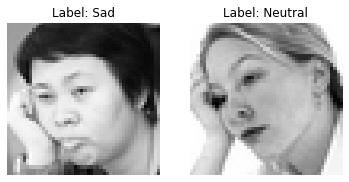

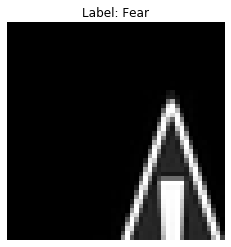

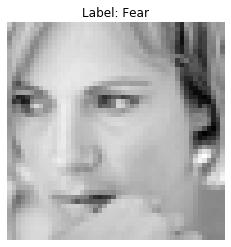

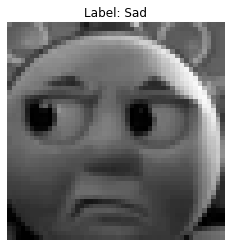

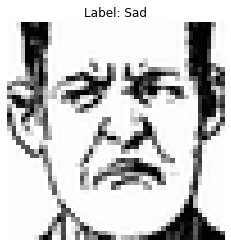

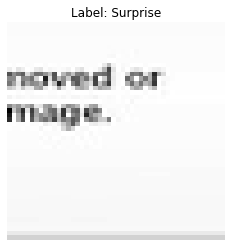

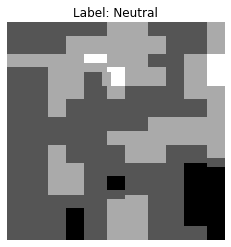

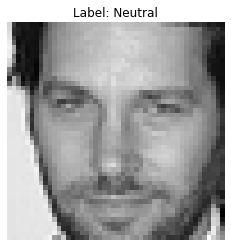

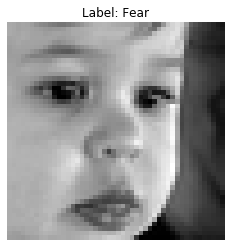

In [28]:
some_image = df['pixels'][2995].split()
some_image = np.array(some_image, dtype=np.int64)
some_label = df['emotion'][2995]
f = plt.figure()
f.add_subplot(1,2, 1)
plt.title("Label: "+some_label)
plt.axis('off')
plt.imshow(np.reshape(some_image, (48,48)),cmap='gray' )


some_image = df['pixels'][2996].split()
some_image = np.array(some_image, dtype=np.int64)
some_label = df['emotion'][2996]
f.add_subplot(1,2, 2)
plt.title("Label: "+some_label)
plt.axis('off')
plt.imshow(np.reshape(some_image, (48,48)),cmap='gray' )
plt.show()

some_image = df['pixels'][60].split()
some_image = np.array(some_image, dtype=np.int64)
some_label = df['emotion'][60]
plt.title("Label: "+some_label)
plt.axis('off')
plt.imshow(np.reshape(some_image, (48,48)),cmap='gray' )
plt.show()

some_image = df['pixels'][49].split()
some_image = np.array(some_image, dtype=np.int64)
some_label = df['emotion'][49]
plt.title("Label: "+some_label)
plt.axis('off')
plt.imshow(np.reshape(some_image, (48,48)),cmap='gray' )
plt.show()

some_image = df['pixels'][762].split()
some_image = np.array(some_image, dtype=np.int64)
some_label = df['emotion'][762]
plt.title("Label: "+some_label)
plt.axis('off')
plt.imshow(np.reshape(some_image, (48,48)),cmap='gray' )
plt.show()

some_image = df['pixels'][1113].split()
some_image = np.array(some_image, dtype=np.int64)
some_label = df['emotion'][1113]
plt.title("Label: "+some_label)
plt.axis('off')
plt.imshow(np.reshape(some_image, (48,48)),cmap='gray' )
plt.show()

some_image = df['pixels'][2060].split()
some_image = np.array(some_image, dtype=np.int64)
some_label = df['emotion'][2060]
plt.title("Label: "+some_label)
plt.axis('off')
plt.imshow(np.reshape(some_image, (48,48)),cmap='gray' )
plt.show()

some_image = df['pixels'][2172].split()
some_image = np.array(some_image, dtype=np.int64)
some_label = df['emotion'][2172]
plt.title("Label: "+some_label)
plt.axis('off')
plt.imshow(np.reshape(some_image, (48,48)),cmap='gray' )
plt.show()

some_image = df['pixels'][2410].split()
some_image = np.array(some_image, dtype=np.int64)
some_label = df['emotion'][2410]
plt.title("Label: "+some_label)
plt.axis('off')
plt.imshow(np.reshape(some_image, (48,48)),cmap='gray' )
plt.show()

some_image = df['pixels'][2415].split()
some_image = np.array(some_image, dtype=np.int64)
some_label = df['emotion'][2415]
plt.title("Label: "+some_label)
plt.axis('off')
plt.imshow(np.reshape(some_image, (48,48)),cmap='gray' )
plt.show()

In [0]:
def getImageLabels(filename):
  
  images_train = []
  labels_train = []
  images_val = []
  labels_val = []    
  images_test = []
  labels_test = []
  skipHeader = True
  filecontents = open(filename)    
  for i in filecontents:
    if skipHeader:            
      skipHeader = False
    else:
      row = i.split(',')                
      if "Training" in row[2]:                
        images_train.append([int(p) for p in row[1].split()])
        labels_train.append(int(row[0]))            
      elif "Public" in row[2]:        
        images_val.append([int(p) for p in row[1].split()])
        labels_val.append(int(row[0]))            
      elif "Private" in row[2]:        
        images_test.append([int(p) for p in row[1].split()])
        labels_test.append(int(row[0]))


  images_train, labels_train = np.array(images_train) / 255.0, np.array(labels_train)
  images_val, labels_val = np.array(images_val) / 255.0, np.array(labels_val)
  images_test, labels_test = np.array(images_test) / 255.0, np.array(labels_test)
  return images_train, labels_train, images_test, labels_test, images_val, labels_val

In [0]:
images_train, labels_train, images_test, labels_test, images_val, labels_val = getImageLabels(filename)
num_class = len(set(labels_train))

In [31]:
len(images_test)

3589

# Reshaping the image to 48x48

In [0]:
N, D = images_train.shape
images_train = images_train.reshape(N, 48, 48, 1)

N, D = images_val.shape
images_val = images_val.reshape(N, 48, 48, 1)

N, D = images_test.shape
images_test = images_test.reshape(N, 48, 48, 1)


In [0]:
labels_train = (np.arange(num_class) == labels_train[:, None]).astype(np.float32)
labels_val = (np.arange(num_class) == labels_val[:, None]).astype(np.float32)

In [0]:
from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
from keras.layers.normalization import BatchNormalization

In [35]:
def my_model():
    model = Sequential()
    input_shape = (48,48,1)
    model.add(Conv2D(64, (5, 5), input_shape=input_shape,activation='relu', padding='same'))
    model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
    model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
    model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(128))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(7))
    model.add(Activation('softmax'))
    
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')
    
    return model
model=my_model()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 48, 48, 64)        1664      
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 48, 48, 64)        102464    
_________________________________________________________________
batch_normalization_5 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 128)       204928    
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 24, 24, 128)       409728    
_________________________________________________________________
batch_normalization_6 (Batch (None, 24, 24, 128)      

In [36]:
path_model='model_filter.h5' # save model at this location after each epoch
K.tensorflow_backend.clear_session() # destroys the current graph and builds a new one
model=my_model() # create the model
K.set_value(model.optimizer.lr,1e-3) # set the learning rate
# fit the model
h=model.fit(x=images_train,     
            y=labels_train, 
            batch_size=64, 
            epochs=20, 
            verbose=1, 
            validation_data=(images_val,labels_val),
            shuffle=True,
            callbacks=[
                ModelCheckpoint(filepath=path_model),
            ]
            )


Train on 28709 samples, validate on 3589 samples
Epoch 1/20
28709/28709 [==============================] - 32s 1ms/step - loss: 1.6904 - acc: 0.3409 - val_loss: 1.6072 - val_acc: 0.3798
Epoch 2/20
28709/28709 [==============================] - 30s 1ms/step - loss: 1.3325 - acc: 0.4889 - val_loss: 1.3405 - val_acc: 0.4804
Epoch 3/20
28709/28709 [==============================] - 30s 1ms/step - loss: 1.1490 - acc: 0.5633 - val_loss: 1.1946 - val_acc: 0.5481
Epoch 4/20
28709/28709 [==============================] - 30s 1ms/step - loss: 1.0284 - acc: 0.6138 - val_loss: 1.1685 - val_acc: 0.5570
Epoch 5/20
28709/28709 [==============================] - 30s 1ms/step - loss: 0.9035 - acc: 0.6668 - val_loss: 1.1644 - val_acc: 0.5787
Epoch 6/20
28709/28709 [==============================] - 30s 1ms/step - loss: 0.7688 - acc: 0.7168 - val_loss: 1.2545 - val_acc: 0.5511
Epoch 7/20
28709/28709 [==============================] - 30s 1ms/step - loss: 0.6043 - acc: 0.7816 - val_loss: 1.4631 - val_acc

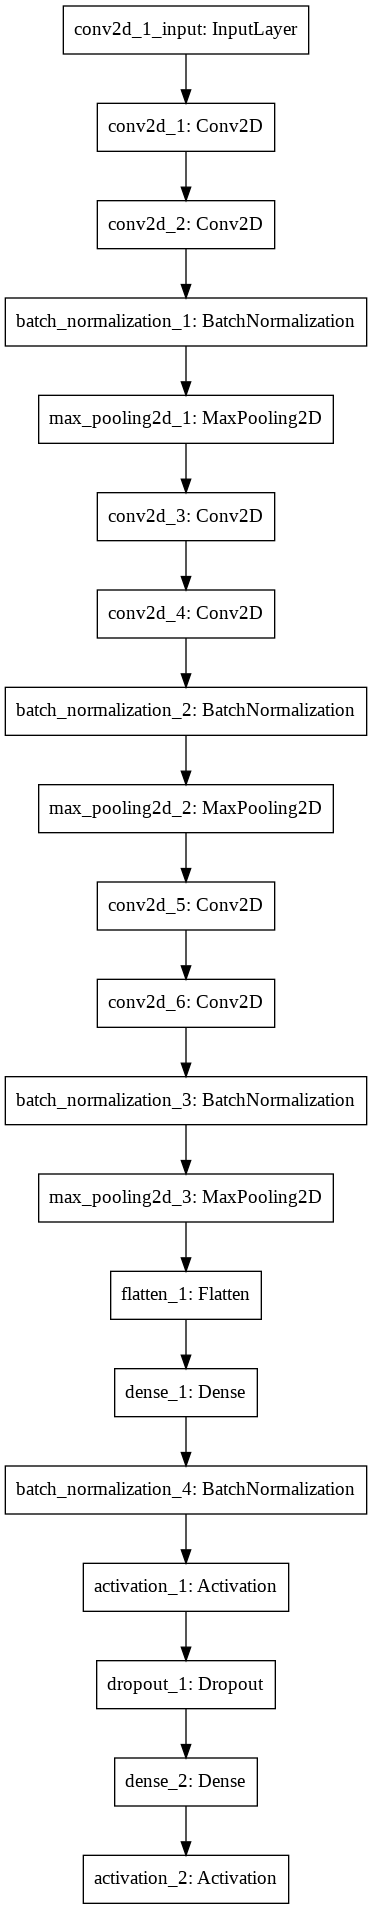

In [37]:
from keras.utils.vis_utils import plot_model
plot_model(model)

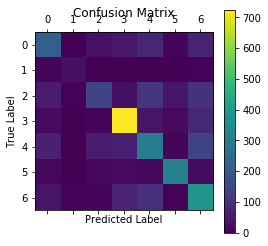

In [38]:
from sklearn.metrics import confusion_matrix
results = model.predict_classes(images_val)
cm = confusion_matrix(np.where(labels_val == 1)[1], results)
plt.matshow(cm)
plt.title('Confusion Matrix')
plt.colorbar()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [39]:
print(h.history['acc'])
print(h.history['val_acc'])
print(h.history.keys())

[0.3408687171083478, 0.4889059179736644, 0.5632728412942024, 0.6138144832672405, 0.6668292172812399, 0.7168135427956115, 0.7816364206118064, 0.8430805671027787, 0.9023302797302191, 0.9327040301220823, 0.9458706328672792, 0.9573304538854034, 0.9628339544945058, 0.9629732836247438, 0.9647845623385981, 0.9706363858231233, 0.9757915635858693, 0.9768713643805078, 0.9731094778495513, 0.9716116896994939]
[0.3797715241346362, 0.4803566453134027, 0.5480635274532746, 0.5569796601056588, 0.5787127333851237, 0.5511284480398164, 0.5126776260796879, 0.5823349122401232, 0.6012816940984144, 0.5820562831204261, 0.5876288660125967, 0.5801058790915589, 0.5906937865866828, 0.5901365282974658, 0.5929228197601586, 0.6026748397965457, 0.5795486207857342, 0.5948732237724184, 0.5893006408636402, 0.5915296740122046]
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


# Training Accuracy Plot

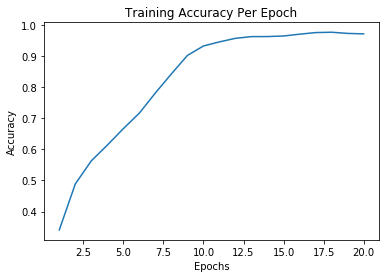

In [40]:
plt.title("Training Accuracy Per Epoch")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot(list(range(1,21)), h.history['acc'] )

# Training Loss per Epoch

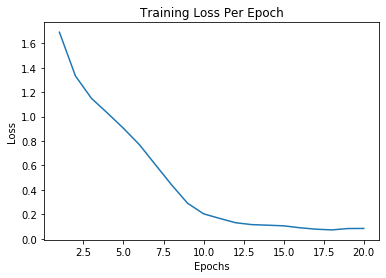

In [41]:
plt.title("Training Loss Per Epoch")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(list(range(1,21)), h.history['loss'] )

# Validation Accuracy per Epoch

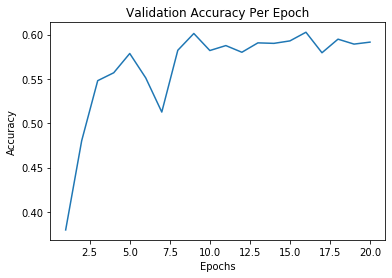

In [42]:
plt.title("Validation Accuracy Per Epoch")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot(list(range(1,21)), h.history['val_acc'] )

# Validation Loss per Epoch

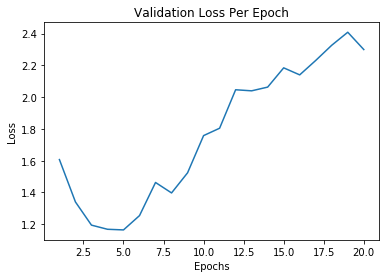

In [43]:
plt.title("Validation Loss Per Epoch")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(list(range(1,21)), h.history['val_loss'] )

In [44]:
objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
y_pos = np.arange(len(objects))
print(y_pos)

[0 1 2 3 4 5 6]


In [45]:
finalaccuracy = 0
for j in range(len(images_test)):    
  x = images_test[j]
  x = np.expand_dims(x, axis = 0)
  predicted_accuracies = model.predict(x)
  
  x = np.array(x, 'float32')
  x = x.reshape([48, 48]);
  a=predicted_accuracies[0]
  ind = np.argmax(a)      
  zzz = labels_test[j]
  if zzz == 0:
    originalemotion = "angry"
  elif zzz == 1:
    originalemotion = "disgust"  
  elif zzz == 2:
    originalemotion = "fear"  
  elif zzz == 3:
    originalemotion = "happy"
  elif zzz == 4:
    originalemotion = "sad"
  elif zzz == 5:
    originalemotion = "surprise"
  elif zzz == 6:
    originalemotion = "neutral"
  
  if originalemotion == objects[ind]:
    finalaccuracy +=1

print("FINAL TEST ACCURACY IS", (finalaccuracy/len(images_test)))

FINAL TEST ACCURACY IS 0.5976595151852884


In [0]:
from skimage import io

In [0]:
def displayImage(path1):  
  img = image.load_img(path1, grayscale=True, target_size=(48, 48))
  img_display=image.load_img(path1, grayscale=False, target_size=(200, 200))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  x /= 255

  predicted_accuracies = model.predict(x)
  emotions_accuracies = predicted_accuracies[0]
  objects_emotions = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
  y_pos = np.arange(len(objects_emotions))
  plt.bar(y_pos, emotions_accuracies, align='center', alpha=0.9)
  plt.tick_params(axis='x', which='both', pad=10,width=4,length=10)
  plt.xticks(y_pos, objects_emotions)
  plt.ylabel('percentage')
  plt.title('emotion')  
  plt.show()
  x = np.array(x, 'float32')
  x = x.reshape([48, 48]);
  a=predicted_accuracies[0]
  ind = np.argmax(a)     
  plt.title("predicted expression:"+ str(objects[ind]).upper()) 
  plt.axis('off')
  plt.imshow(img_display)


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


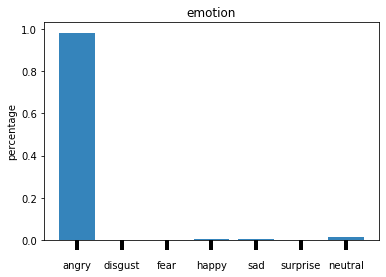

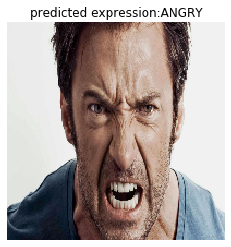

In [48]:
displayImage('drive/test_images/Wolverine.jpg')

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


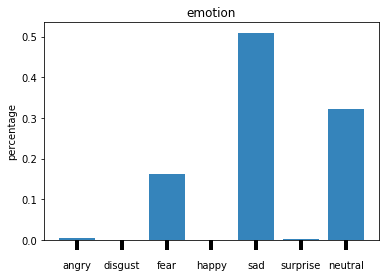

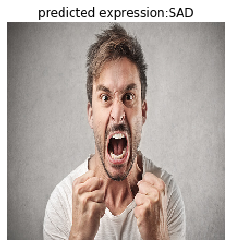

In [49]:
displayImage('drive/test_images/angry3.jpg')

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


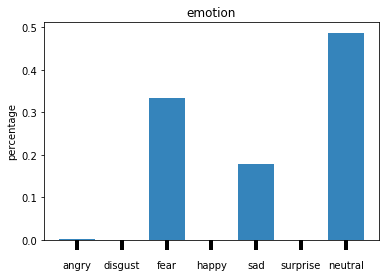

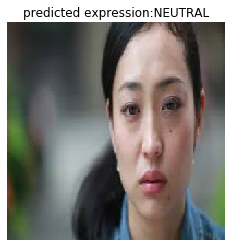

In [50]:
displayImage('drive/test_images/sad2.jpg')

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


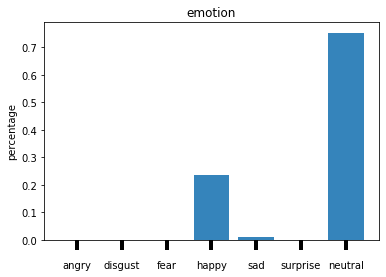

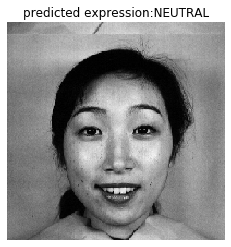

In [51]:
displayImage('drive/test_images/KA.HA1.29.tiff')

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


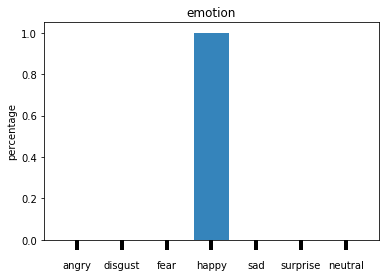

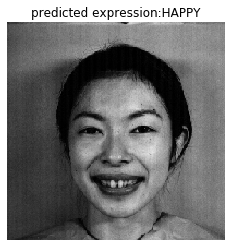

In [52]:
displayImage('drive/test_images/NA.HA3.204.tiff')

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


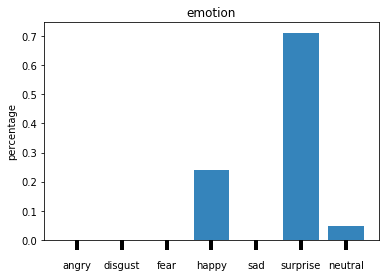

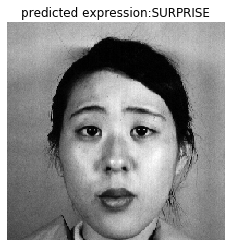

In [53]:
displayImage('drive/test_images/NM.SA3.100.tiff')

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


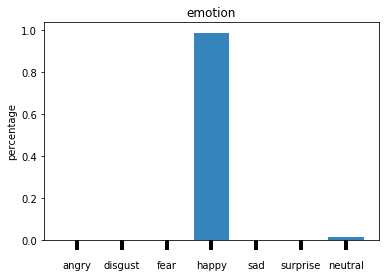

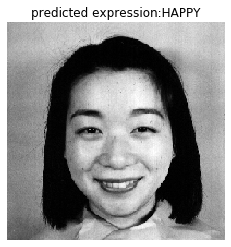

In [54]:
displayImage('drive/test_images/YM.HA3.54.tiff')

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


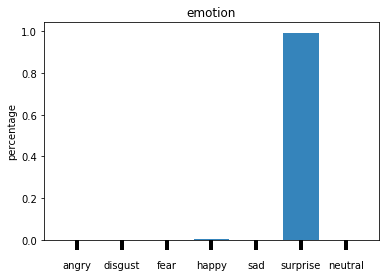

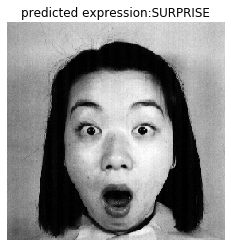

In [55]:
displayImage('drive/test_images/YM.SU3.60.tiff')

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


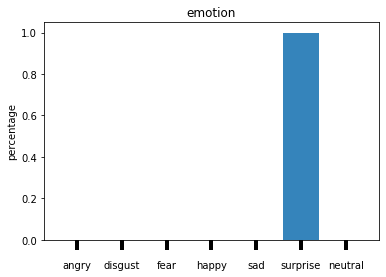

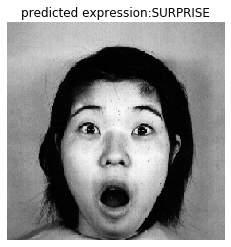

In [56]:
displayImage('drive/test_images/KM.SU1.14.tiff')

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


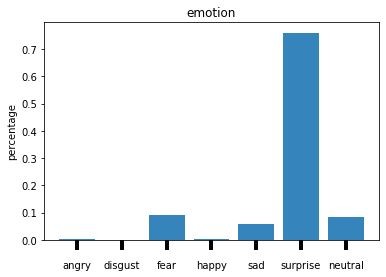

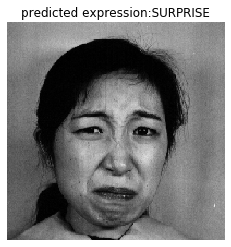

In [57]:
displayImage('drive/test_images/KA-DI3.tiff')

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


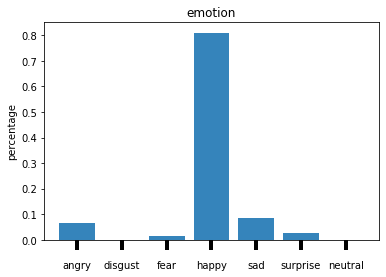

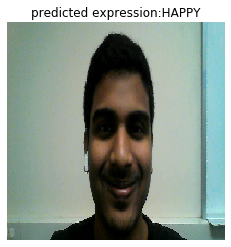

In [58]:
displayImage('drive/test_images/aghappy.jpg')

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


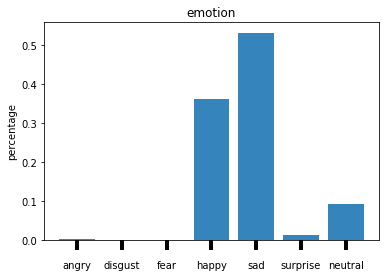

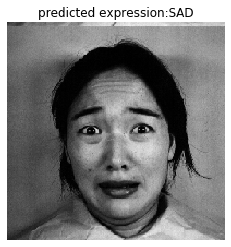

In [59]:
displayImage('drive/test_images/MK.FE1.131.tiff')

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


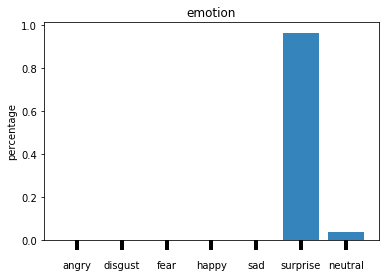

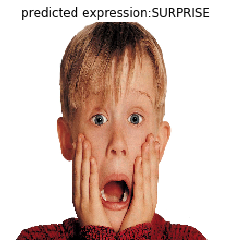

In [60]:
displayImage('drive/test_images/home-alone.jpg')

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


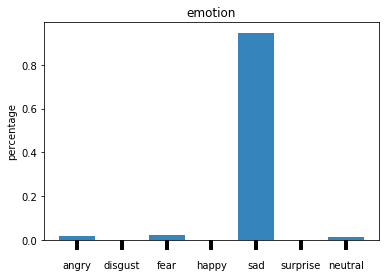

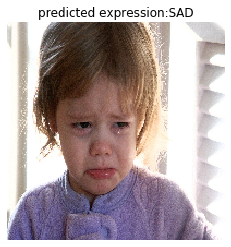

In [61]:
displayImage('drive/test_images/cry.jpg')

# Calculating the accuracy for JAFFE dataset with the model trained on FER2013

In [0]:
df2 = pd.read_csv('drive/facial_datasets/jaffe.csv')

In [0]:
df2["emotion"] = ""
for i in range(len(df2)):     
  if "AN" in df2.loc[i]["name"]:                            
    df2["emotion"][i] = "angry"
      
  elif "DI" in df2.loc[i]["name"]:                            
    df2["emotion"][i] = "disgust"
      
  elif "FE" in df2.loc[i]["name"]:                            
    df2["emotion"][i] = "fear"
      
  elif "HA" in df2.loc[i]["name"]:                            
    df2["emotion"][i] = "happy"
  
  elif "NE" in df2.loc[i]["name"]:                            
    df2["emotion"][i] = "neutral"
  
  elif "SA" in df2.loc[i]["name"]:                            
    df2["emotion"][i] = "sad"
  
  elif "SU" in df2.loc[i]["name"]:                            
    df2["emotion"][i] = "surprise"
  

In [64]:
finalaccuracy = 0  
import os
listoffiles = os.listdir("drive/test_images/jaffe")
for j in listoffiles:  
  img = image.load_img('drive/test_images/jaffe/'+j, grayscale=True, target_size=(48, 48)) 
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)
  predicted_accuracies = model.predict(x)
  
  x = np.array(x, 'float32')
  x = x.reshape([48, 48]);
  a=predicted_accuracies[0]
  ind = np.argmax(a)      
  originalemotion = df2['emotion'][df2.index[df2['name'] == j.split(".")[0]].tolist()[0]]  
  if originalemotion == objects[ind]:
    finalaccuracy +=1

print("FINAL TEST ACCURACY IS", (finalaccuracy/213))

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


FINAL TEST ACCURACY IS 0.15023474178403756


# The FINAL ACCURACY HERE IS LOW. It is mostly because informatin is being lost when a good resolution image is being resized to 48x48. The model is predicting surprise correctly becuase it is recognizing the mouth being open

In [0]:
import os,cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

import keras

from keras.utils import np_utils

from keras import backend as K

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop,adam
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization

In [66]:
listoffiles = os.listdir("drive/test_images/jaffe")

img_rows=256
img_cols=256
num_channel=1

num_epoch=10

img_data_list=[]
labels = []


for img in listoffiles:
  input_img = cv2.imread("drive/test_images/jaffe/"+img)
  input_img_resize=cv2.resize(input_img,(128,128))
  img_data_list.append(input_img_resize)
  if "AN" in img:
    labels.append(0)
  elif "DI" in img:
    labels.append(1)
  elif "FE" in img:
    labels.append(2)
  elif "HA" in img:
    labels.append(3)
  elif "NE" in img:
    labels.append(4)
  elif "SA" in img:
    labels.append(5)
  elif "SU" in img:
    labels.append(6)    

img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data = img_data/255
img_data.shape




(213, 128, 128, 3)

In [0]:
num_classes = 7

num_of_samples = img_data.shape[0]
names = ['ANGRY','DISGUST','FEAR','HAPPY','NEUTRAL','SAD','SURPRISE']

def getLabel(id):
  return ['ANGRY','DISGUST','FEAR','HAPPY','NEUTRAL','SAD','SURPRISE'][id]


In [0]:
Y = np_utils.to_categorical(labels, num_classes)
x,y = shuffle(img_data,Y, random_state=2)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=2)

In [0]:
input_shape = (128,128,3)
model = Sequential()
model.add(Conv2D(64, (5, 5), input_shape=input_shape,activation='relu', padding='same'))
model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(7))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')


In [70]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 128, 128, 64)      4864      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 128, 128, 64)      102464    
_________________________________________________________________
batch_normalization_5 (Batch (None, 128, 128, 64)      256       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 64, 64, 128)       204928    
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 64, 64, 128)       409728    
_________________________________________________________________
batch_normalization_6 (Batch (None, 64, 64, 128)      

In [0]:
from keras import callbacks
filename='model_at_each_epoch.csv'
filepath="Best-weights-my_model-{epoch:03d}-{loss:.4f}-{acc:.4f}.hdf5"

csv_log=callbacks.CSVLogger(filename, separator=',', append=False)
checkpoint = callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [csv_log,checkpoint]
callbacks_list = [csv_log]

In [72]:
hist = model.fit(X_train, y_train, batch_size=7, nb_epoch=30, verbose=1, validation_data=(X_test, y_test),callbacks=callbacks_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 181 samples, validate on 32 samples
Epoch 1/30
181/181 [==============================] - 4s 20ms/step - loss: 2.2616 - acc: 0.2265 - val_loss: 8.8888 - val_acc: 0.1875
Epoch 2/30
181/181 [==============================] - 2s 12ms/step - loss: 1.7886 - acc: 0.3260 - val_loss: 3.6654 - val_acc: 0.1875
Epoch 3/30
181/181 [==============================] - 2s 12ms/step - loss: 1.4389 - acc: 0.5028 - val_loss: 1.6057 - val_acc: 0.3438
Epoch 4/30
181/181 [==============================] - 2s 12ms/step - loss: 1.2233 - acc: 0.5801 - val_loss: 1.8347 - val_acc: 0.4375
Epoch 5/30
181/181 [==============================] - 2s 12ms/step - loss: 1.0965 - acc: 0.6243 - val_loss: 1.8587 - val_acc: 0.3750
Epoch 6/30
181/181 [==============================] - 2s 12ms/step - loss: 0.8267 - acc: 0.7127 - val_loss: 1.1456 - val_acc: 0.5313
Epoch 7/30
181/181 [==============================] - 2s 12ms/step - loss: 0.8352 - acc: 0.7238 - val_loss: 2.5939 - val_acc: 0.4063
Epoch 8/30
181/181 [====

<Figure size 432x288 with 0 Axes>

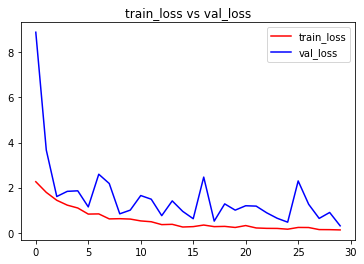

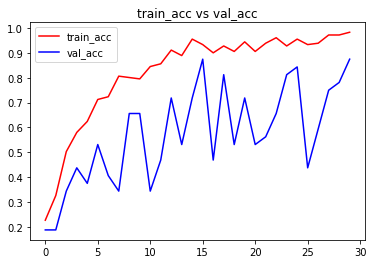

<Figure size 432x288 with 0 Axes>

In [73]:
%matplotlib inline

train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['acc']
val_acc=hist.history['val_acc']

epochs = range(len(train_acc))

plt.plot(epochs,train_loss,'r', label='train_loss')
plt.plot(epochs,val_loss,'b', label='val_loss')
plt.title('train_loss vs val_loss')
plt.legend()
plt.figure()

plt.plot(epochs,train_acc,'r', label='train_acc')
plt.plot(epochs,val_acc,'b', label='val_acc')
plt.title('train_acc vs val_acc')
plt.legend()
plt.figure()

Test Loss: 0.3063044548034668
Test accuracy: 0.875


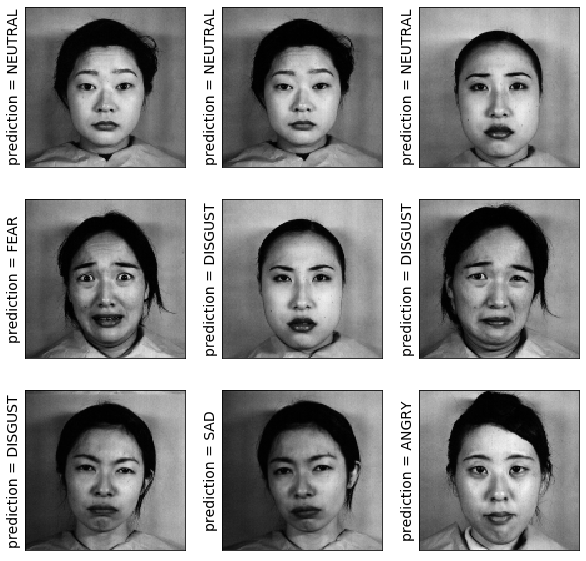

In [74]:

score = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

test_image = X_test[0:1]


res = model.predict_classes(X_test[:9])
plt.figure(figsize=(10, 10))

for i in range(0, 9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_test[i],cmap=plt.get_cmap('gray'))
    plt.gca().get_xaxis().set_ticks([])
    plt.gca().get_yaxis().set_ticks([])
    plt.ylabel('prediction = %s' % getLabel(res[i]), fontsize=14)
plt.show()

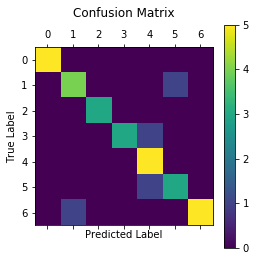

In [85]:
from sklearn.metrics import confusion_matrix
results = model.predict_classes(X_test)
cm = confusion_matrix(np.where(y_test == 1)[1], results)
plt.matshow(cm)
plt.title('Confusion Matrix\n')
plt.colorbar()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()